## Importing Dependencies

In [1]:
import pandas as pd 
import numpy as nd
import seaborn as sns
import matplotlib.pyplot as plt 
pd.plotting.register_matplotlib_converters()
%matplotlib inline
print('setup complete.')

setup complete.


## Importing Dataset

In [2]:
c_data=pd.read_csv('./Documents/covid19_tweets.csv')

In [3]:
c_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
c_data.describe(include='all')

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
count,179108,142337,168822,179108,1.791080e+05,179108.000000,1.791080e+05,179108,179108,179108,127774,179031,179108
unique,92276,26920,89200,93708,NaN,NaN,NaN,2,136611,178683,52640,610,1
top,GlobalPandemic.NET,India,Breaking News & Critical Information to SURVIV...,2010-07-13 21:58:05,NaN,NaN,NaN,False,2020-08-06 16:00:00,"The incompetence of this administration, and t...",['COVID19'],Twitter Web App,False
freq,679,3741,679,679,NaN,NaN,NaN,156013,26,13,37792,56891,179108
mean,NaN,NaN,NaN,NaN,1.090555e+05,2121.701566,1.444411e+04,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,8.414670e+05,9162.553072,4.452270e+04,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.720000e+02,148.000000,2.060000e+02,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,9.920000e+02,542.000000,1.791000e+03,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.284000e+03,1725.250000,9.388000e+03,NaN,NaN,NaN,NaN,NaN,NaN


#### The Total Number of rows is 179108 and there are total 13 columns.

In [5]:
c_data.shape

(179108, 13)

# Checking Datatypes of the columns.

In [10]:
data_types=pd.DataFrame(c_data.dtypes,columns=['data_types'])

In [7]:
def highlight_object(element):
    if element=='object':
        color="Chartreuse"
    elif element=='bool':
        color="yellow"
    else:
        color="white"
    return "color:%s" % color

In [11]:
data=data_types.style.applymap(highlight_object)
data.set_properties(**{'background-color':'black',
                             'border-color':'cyan',
                             'border-style':'solid',
                             'border-width':'2px'})

,data_types
user_name,object
user_location,object
user_description,object
user_created,object
user_followers,int64
user_friends,int64
user_favourites,int64
user_verified,bool
date,object
text,object


#### Checking for missing values.

In [12]:
c_data.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64

In [13]:
pd.set_option('display.max_rows',None)

In [14]:
not_null_locations=c_data.user_location.loc[c_data.user_location.notnull()]

In [15]:
not_null_locations.shape

(142337,)

In [16]:
pd.set_option('display.max_colwidth',-1)

In [17]:
null_locations=c_data.user_location.loc[c_data.user_location.isnull()]

In [18]:
null_locations.isnull().sum()

36771

In [19]:
def splitter(string):
    words=[]
    words=string.split(",")
    if len(words)==1:
        return True
    else:
        return False

In [20]:
not_null_locations.loc[not_null_locations.apply(splitter)][:50]

0      astroworld                                                                        
3      Stuck in the Middle                                                               
4      Jammu and Kashmir                                                                 
5      Новоро́ссия                                                                       
9      👇🏻location at link below👇🏻                                                        
12     Hotel living - various cities!  Who needs a home when hotel living is so fabulous!
13     Africa                                                                            
14     New Delhi                                                                         
17     Brussels                                                                          
21     #AFRICA #MENA                                                                     
22     Northwest Indiana                                                                 
23     100

## Most Popular sources.

In [21]:
c_data.source.value_counts()

Twitter Web App                     56891
Twitter for Android                 40179
Twitter for iPhone                  35472
TweetDeck                           8543 
Hootsuite Inc.                      7321 
Twitter for iPad                    4336 
Buffer                              2728 
Sprout Social                       1833 
Instagram                           1759 
IFTTT                               1545 
dlvr.it                             681  
GlobalPandemic.NET                  679  
LinkedIn                            628  
COVID19-Updates                     625  
Twitter Media Studio                596  
WordPress.com                       537  
HubSpot                             513  
Sprinklr                            497  
FS Poster                           414  
Dynamic Signal                      391  
Resistbot Open Letters              390  
Cheap Bots, Done Quick!             335  
Paper.li                            322  
Twitter for Advertisers           

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0, 0.5, 'Tweets')

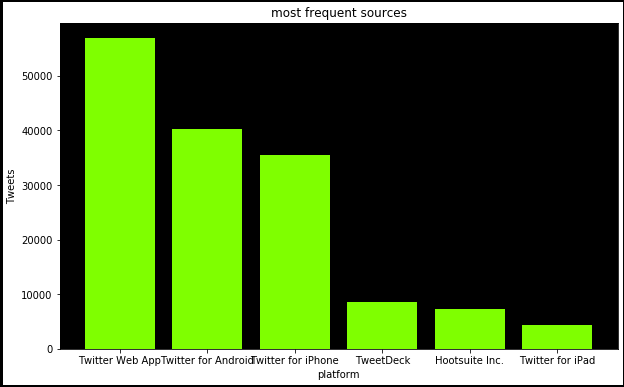

In [22]:
plt.figure(figsize=(10,6),linewidth=5,edgecolor="black")
plt.title("most frequent sources")

plt.bar(["Twitter Web App","Twitter for Android","Twitter for iPhone","TweetDeck","Hootsuite Inc.","Twitter for iPad"],
        c_data.source.value_counts()[:6].values,color="Chartreuse")
ax=plt.axes()
ax.set_facecolor("black")
plt.xlabel('platform')
plt.ylabel("Tweets")

In [23]:
c_data[c_data.user_verified.isnull()]=False

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0, 0.5, 'no. of users verified/non_verified')

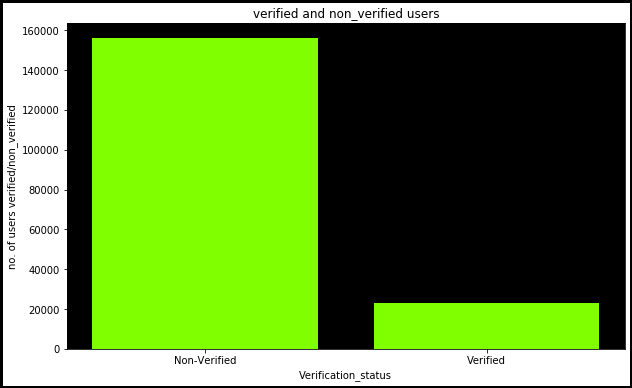

In [24]:
plt.figure(figsize=(10,6),linewidth=5,edgecolor="black")
plt.title("verified and non_verified users")
plt.bar(["Non-Verified","Verified"],c_data.user_verified.value_counts().values,
        color="Chartreuse")
ax=plt.axes()
ax.set_facecolor("black")
plt.xlabel('Verification_status')
plt.ylabel("no. of users verified/non_verified")

In [25]:
non_verified_user_sources=c_data.source.loc[c_data.user_verified==False].value_counts()

In [26]:
non_verified_user_sources

Twitter Web App                     48549
Twitter for Android                 38488
Twitter for iPhone                  32882
Hootsuite Inc.                      5763 
TweetDeck                           4536 
Twitter for iPad                    4192 
Buffer                              2266 
Instagram                           1734 
IFTTT                               1451 
Sprout Social                       1222 
GlobalPandemic.NET                  679  
COVID19-Updates                     625  
LinkedIn                            623  
dlvr.it                             606  
WordPress.com                       523  
HubSpot                             486  
FS Poster                           414  
Dynamic Signal                      391  
Cheap Bots, Done Quick!             335  
Paper.li                            291  
IAMBLOG2TWITTER                     266  
Sprinklr                            228  
Alexander Higgins                   225  
Zoho Social                       

## Most Popular sources among Non-Verified people.

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Tweets')

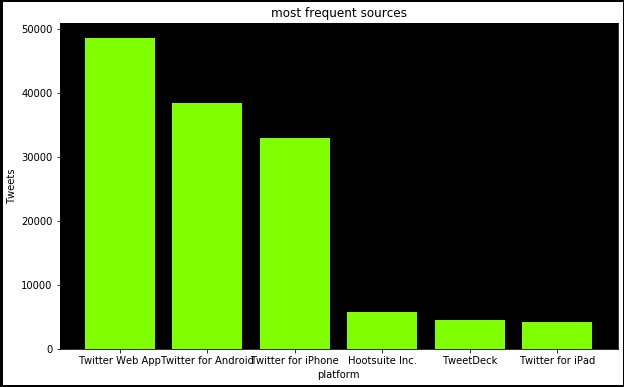

In [27]:
plt.figure(figsize=(10,6),linewidth=5,edgecolor="black")
plt.title("most frequent sources")
plt.bar(non_verified_user_sources.index[:6],non_verified_user_sources.values[:6],color="Chartreuse")
ax=plt.axes()
ax.set_facecolor('black')
plt.xlabel('platform')
plt.ylabel("Tweets")

In [28]:
verified_user_sources=c_data.source.loc[c_data.user_verified==True].value_counts()

In [29]:
verified_user_sources

Twitter Web App                     8342
TweetDeck                           4007
Twitter for iPhone                  2590
Twitter for Android                 1691
Hootsuite Inc.                      1558
Sprout Social                       611 
Buffer                              462 
Twitter Media Studio                454 
Resistbot Open Letters              390 
Blood Donors India                  281 
Sprinklr                            269 
Twitter Media Studio - LiveCut      167 
SocialFlow                          153 
Twitter for Advertisers             144 
Twitter for iPad                    144 
Orlo                                135 
China Xinhua News                   114 
Africa Newsroom                     110 
IFTTT                               94  
Salesforce - Social Studio          79  
Socialbakers                        79  
SocialNewsDesk                      77  
dlvr.it                             75  
Echobox                             75  
Grabyo          

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Tweets')

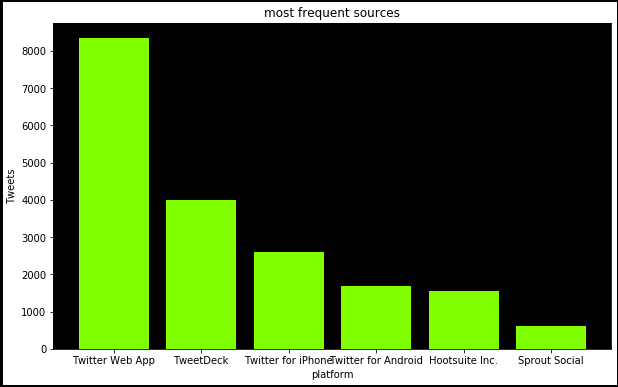

In [30]:
plt.figure(figsize=(10,6),linewidth=5,edgecolor="black")
plt.title("most frequent sources")
plt.bar(verified_user_sources.index[:6],verified_user_sources.values[:6],color="Chartreuse")
ax=plt.axes()
ax.set_facecolor("Black")
plt.xlabel('platform')
plt.ylabel("Tweets")

In [31]:
c_data.source.isnull().sum()

77

In [32]:
c_data.user_verified.value_counts()

False    156013
True     23095 
Name: user_verified, dtype: int64